In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix, accuracy_score, classification_report,
    ConfusionMatrixDisplay
)
from sklearn.model_selection import GridSearchCV 
import matplotlib.pyplot as plt
from treatment import get_treated_data

[nltk_data] Downloading package stopwords to /home/rafael/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/rafael/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/rafael/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/rafael/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
X_train, X_test, y_train, y_test = get_treated_data()

In [3]:
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [4]:
y_pred = logreg_model.predict(X_test)

In [5]:
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo:", accuracy)

Acurácia do modelo: 0.9423407917383821


In [6]:
report = classification_report(y_test, y_pred)
print("Relatório de classificação:")
print(report)

Relatório de classificação:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1829
           1       0.96      0.76      0.85       495

    accuracy                           0.94      2324
   macro avg       0.95      0.88      0.91      2324
weighted avg       0.94      0.94      0.94      2324



In [7]:
confusion_matrix_ = confusion_matrix(y_test, y_pred)

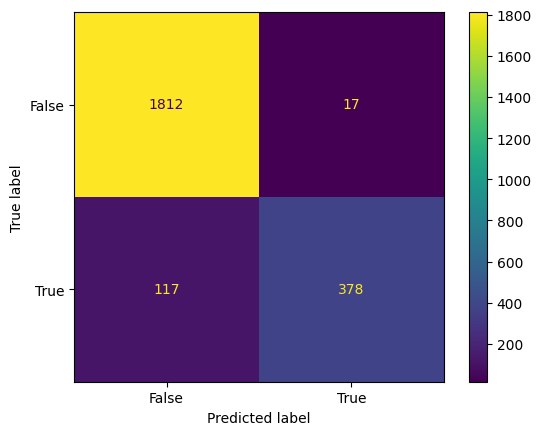

In [8]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_, display_labels = [False, True])

cm_display.plot()
plt.show()

In [9]:
#Implementação do Grid Search

In [10]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'class_weight': [None, 'balanced']
}

In [11]:
grid_search = GridSearchCV(logreg_model, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced']},
             scoring='f1')

In [12]:
print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)


Melhores parâmetros encontrados:
{'C': 10, 'class_weight': None}


In [13]:
best_logreg_model = grid_search.best_estimator_


In [14]:
best_logreg_model.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000)

In [15]:
grid_pred = best_logreg_model.predict(X_test)

In [16]:
grid_accuracy = accuracy_score(y_test, grid_pred)
print("Acurácia do modelo:", grid_accuracy)

Acurácia do modelo: 0.9475043029259896


In [17]:
classification_rep = classification_report(y_test, grid_pred)
print("Relatório de classificação:")
print(classification_rep)

Relatório de classificação:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1829
           1       0.93      0.81      0.87       495

    accuracy                           0.95      2324
   macro avg       0.94      0.90      0.92      2324
weighted avg       0.95      0.95      0.95      2324



In [18]:
grid_confusion_matrix = confusion_matrix(y_test, y_pred)

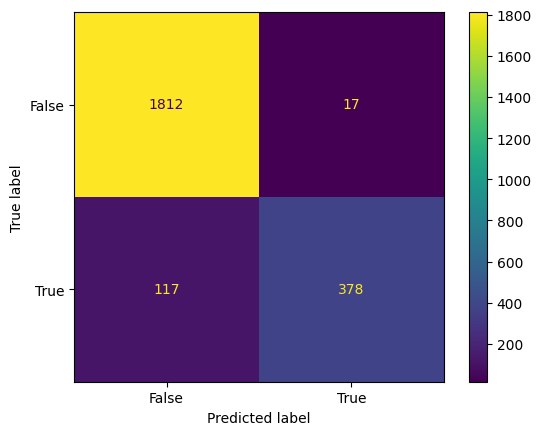

In [19]:
grid_cm_display = ConfusionMatrixDisplay(confusion_matrix = grid_confusion_matrix, display_labels = [False, True])

grid_cm_display.plot()
plt.show()

In [ ]:
test_text = "Congratulations! You've won a free vacation. Claim your prize now!"

processed_test_text = finalpreprocess(test_text)

print("Texto de teste após pré-processamento:", processed_test_text)

prediction = best_decision_tree_model.predict(processed_test_text)

if prediction[0]:
    print("O texto é spam!")
else:
    print("O texto não é spam (ham)!")